In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)*100

print("% of women who survived:", rate_women)

% of women who survived: 74.20382165605095


In [5]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)*100

print("% of men who survived:", rate_men)

% of men who survived: 18.890814558058924


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analysis (EDA)

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train_data.isnull().sum()

# returns a Series where the index represents column names, and the values represent the number of missing values in each column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
train_data.nunique()

# returns the count of distinct (unique) values in a column or across the entire DataFrame

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [10]:
train_data["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

Text(0.5, 1.0, 'Target Distribution')

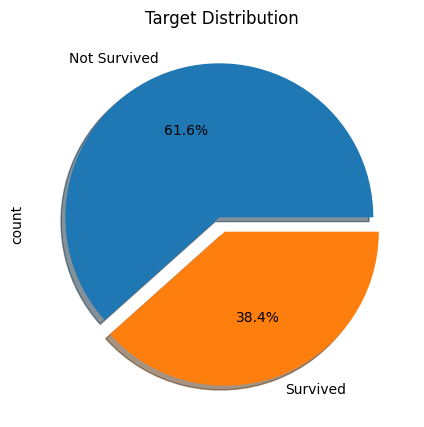

In [11]:
plt.figure(figsize=(5,5))
train_data["Survived"].value_counts().plot.pie(explode=[0.05,0.05], autopct='%1.1f%%', 
                                          labels=["Not Survived","Survived"],
                                          shadow=True).set_title("Target Distribution")

In [12]:
train_data.duplicated().sum()

0

<Axes: >

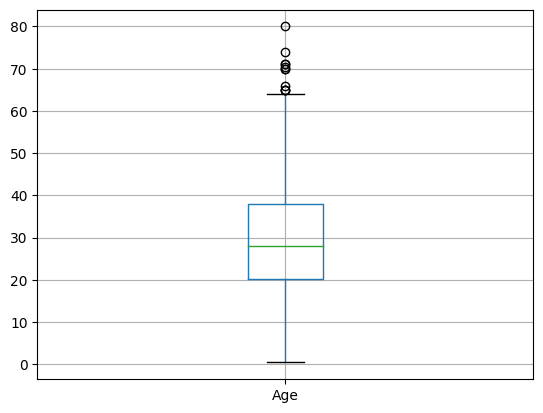

In [13]:
train_data[["Age"]].boxplot()

<Axes: >

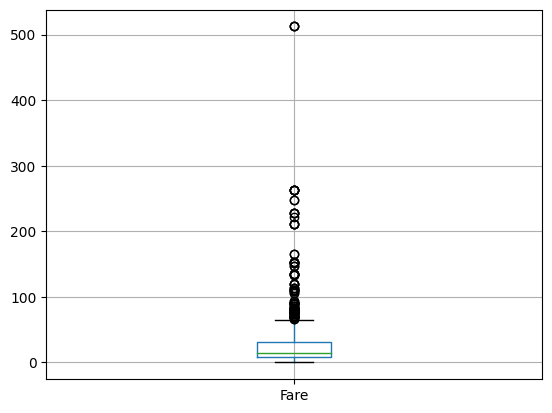

In [14]:
train_data[["Fare"]].boxplot()

EDA observations:

1. Dataset contains variables like "Ticket" and "Names", these can be removed as they appear to be random unique identifies.
2. "PassengerId" is here used only for indexing, so it can be also removed.
3. Target class "Survived" has binary output with slighlt imbalance data.
4. "Age" and "Cabin" have missing values. The values in "Age" can be filled but in "Cabin" as most the values are missing, it will be removed.
5. With the help of boxplot, we can identify that variables "Age" and "Fare" contain outliers.
6. Lastly, no significant correlation is seen between independent variables.

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data.drop("Survived",axis=1), 
                                                   train_data["Survived"],
                                                   test_size=0.3,
                                                   random_state=100)
X_train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
69,70,3,"Kink, Mr. Vincenz",male,26.0,2,0,315151,8.6625,NaN,S
85,86,3,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",female,33.0,3,0,3101278,15.8500,NaN,S
794,795,3,"Dantcheff, Mr. Ristiu",male,25.0,0,0,349203,7.8958,NaN,S
161,162,2,"Watt, Mrs. James (Elizabeth ""Bessie"" Inglis Mi...",female,40.0,0,0,C.A. 33595,15.7500,NaN,S
815,816,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0000,B102,S
...,...,...,...,...,...,...,...,...,...,...,...
855,856,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.3500,NaN,S
871,872,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
835,836,1,"Compton, Miss. Sara Rebecca",female,39.0,1,1,PC 17756,83.1583,E49,C
792,793,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.5500,NaN,S


In [16]:
# removing variables

drop_list = ["PassengerId", "Name", "Cabin", "Ticket"]
X_train = X_train.drop(drop_list,axis=1)
X_test = X_test.drop(drop_list,axis=1)

X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
69,3,male,26.0,2,0,8.6625,S
85,3,female,33.0,3,0,15.8500,S
794,3,male,25.0,0,0,7.8958,S
161,2,female,40.0,0,0,15.7500,S
815,1,male,NaN,0,0,0.0000,S
...,...,...,...,...,...,...,...
855,3,female,18.0,0,1,9.3500,S
871,1,female,47.0,1,1,52.5542,S
835,1,female,39.0,1,1,83.1583,C
792,3,female,NaN,8,2,69.5500,S


In [17]:
# dealing with missing values

X_train["Age"] = X_train["Age"].fillna(X_train["Age"].median())
X_train["Embarked"] = X_train["Embarked"].fillna(X_train["Embarked"].mode())

X_test["Age"] = X_test["Age"].fillna(X_test["Age"].median())
X_test["Embarked"] = X_test["Embarked"].fillna(X_test["Embarked"].mode())

X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
69,3,male,26.0,2,0,8.6625,S
85,3,female,33.0,3,0,15.8500,S
794,3,male,25.0,0,0,7.8958,S
161,2,female,40.0,0,0,15.7500,S
815,1,male,28.5,0,0,0.0000,S
...,...,...,...,...,...,...,...
855,3,female,18.0,0,1,9.3500,S
871,1,female,47.0,1,1,52.5542,S
835,1,female,39.0,1,1,83.1583,C
792,3,female,28.5,8,2,69.5500,S


In [18]:
# one hot encoding variables

X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

X_train

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
69,3,26.0,2,0,8.6625,False,True,False,False,True
85,3,33.0,3,0,15.8500,True,False,False,False,True
794,3,25.0,0,0,7.8958,False,True,False,False,True
161,2,40.0,0,0,15.7500,True,False,False,False,True
815,1,28.5,0,0,0.0000,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...
855,3,18.0,0,1,9.3500,True,False,False,False,True
871,1,47.0,1,1,52.5542,True,False,False,False,True
835,1,39.0,1,1,83.1583,True,False,True,False,False
792,3,28.5,8,2,69.5500,True,False,False,False,True


In [19]:
# scaling variables

columns = X_train.columns

import pandas as pd
from sklearn.preprocessing import MinMaxScaler

x_train = X_train.values
x_test = X_test.values

min_max_scaler = MinMaxScaler()

x_train_scaled = min_max_scaler.fit_transform(x_train)
x_test_scaled = min_max_scaler.transform(x_test)

X_train = pd.DataFrame(x_train_scaled)
X_test = pd.DataFrame(x_test_scaled)
X_train.head()

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.347649,0.250,0.0,0.016908,0.0,1.0,0.0,0.0,1.0
1,1.0,0.442783,0.375,0.0,0.030937,1.0,0.0,0.0,0.0,1.0
2,1.0,0.334058,0.000,0.0,0.015412,0.0,1.0,0.0,0.0,1.0
3,0.5,0.537918,0.000,0.0,0.030742,1.0,0.0,0.0,0.0,1.0
4,0.0,0.381625,0.000,0.0,0.000000,0.0,1.0,0.0,0.0,1.0


In [20]:
X_train.columns = columns
X_test.columns = columns
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1.0,0.347649,0.250,0.0,0.016908,0.0,1.0,0.0,0.0,1.0
1,1.0,0.442783,0.375,0.0,0.030937,1.0,0.0,0.0,0.0,1.0
2,1.0,0.334058,0.000,0.0,0.015412,0.0,1.0,0.0,0.0,1.0
3,0.5,0.537918,0.000,0.0,0.030742,1.0,0.0,0.0,0.0,1.0
4,0.0,0.381625,0.000,0.0,0.000000,0.0,1.0,0.0,0.0,1.0


In [21]:
# used GridSearchCV to find best parameter for each model

from sklearn.svm import LinearSVC,SVC,NuSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,f1_score

svm = SVC()
nu_svm = NuSVC()
linear_svm = LinearSVC(max_iter=10000)

svm_grid_parameters = {'C':[0.01,0.1, 1, 10, 100, 1000], 'kernel':['linear', 'poly', 'sigmoid','rbf'], 'gamma':[1, 0.1, 0.01, 0.001, 0.0001]}
nu_svm_grid_parameters = {'nu':[0.1,0.3,0.5,0.7], 'kernel':['linear', 'poly', 'sigmoid','rbf'], 'gamma':[1, 0.1, 0.01, 0.001, 0.0001]}
linear_svm_grid_parameters = {'C':[0.01,0.1, 1, 10, 100, 1000]}

svm_grid_search = GridSearchCV(svm, svm_grid_parameters)
nu_svm_grid_search = GridSearchCV(nu_svm, nu_svm_grid_parameters)
linear_svm_grid_search = GridSearchCV(linear_svm, linear_svm_grid_parameters)

In [22]:
# best parameters for SVM

svm_grid_search.fit(X_train, y_train)
print("best parameters for SVM are:",svm_grid_search.best_estimator_)
y_pred_svm_grid = svm_grid_search.predict(X_test)

best parameters for SVM are: SVC(C=10, gamma=1)


In [23]:
# best parameters for Nu-SVM

nu_svm_grid_search.fit(X_train, y_train)
print("best parameters for NuSVM are:",nu_svm_grid_search.best_estimator_)
y_pred_nu_svm_grid = nu_svm_grid_search.predict(X_test)

best parameters for NuSVM are: NuSVC(gamma=1, kernel='poly', nu=0.3)


In [24]:
# best parameters for Linear-SVM

import warnings
warnings.filterwarnings('ignore')

linear_svm_grid_search.fit(X_train, y_train)
print("best parameters for LinearSVM are:",linear_svm_grid_search.best_estimator_)
y_pred_linear_svm_grid = linear_svm_grid_search.predict(X_test)

best parameters for LinearSVM are: LinearSVC(C=1, max_iter=10000)


In [25]:
# accuracy

print(f"Accuracy Score (%) for:\n")
print("SVM: {} %".format(round(accuracy_score(y_test, y_pred_svm_grid)*100,2)))
print("NuSVM: {} %".format(round(accuracy_score(y_test, y_pred_nu_svm_grid)*100,2)))
print("LinearSVM: {} % ".format(round(accuracy_score(y_test, y_pred_linear_svm_grid)*100,2)))

Accuracy Score (%) for:

SVM: 80.97 %
NuSVM: 81.34 %
LinearSVM: 78.73 % 


In [26]:
# f1 score

print(f"f1-score for: \n")
print("SVM: {}".format(round(f1_score(y_test, y_pred_svm_grid),2)))
print("NuSVM: {}".format(round(f1_score(y_test, y_pred_nu_svm_grid),2)))
print("LinearSVM: {}".format(round(f1_score(y_test, y_pred_linear_svm_grid),2)))

f1-score for: 

SVM: 0.72
NuSVM: 0.73
LinearSVM: 0.72


Model Nu-SVC with hypertuned parameters (nu=0.3, kernel='poly', gamma=1) has highest accuracy (81.34%) and F1 score(0.73). So it is the most accurate model.

In [27]:
# prediction test

test = pd.read_csv('../input/titanic/test.csv')
test_data = test.copy()

test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [28]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Here it can be seen that with "Age", "Fare" also has missing value. So, we have to take care of that.

In this problem, we have access to test.csv but in other problem, we might not have access to test dataset so we have to consider that and build model according to that.

In [29]:
test = test.drop(drop_list, axis=1)
test["Age"] = test["Age"].fillna(test["Age"].median())
test["Embarked"] = test["Embarked"].fillna(test["Embarked"].mode())
test["Fare"] = test["Fare"].fillna(test["Fare"].median())
test = pd.get_dummies(test)

test_values = test.values
test_scaled = min_max_scaler.fit_transform(test_values)
test = pd.DataFrame(test_scaled)
test.columns = columns

test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1.0,0.452723,0.000,0.000000,0.015282,0.0,1.0,0.0,1.0,0.0
1,1.0,0.617566,0.125,0.000000,0.013663,1.0,0.0,0.0,0.0,1.0
2,0.5,0.815377,0.000,0.000000,0.018909,0.0,1.0,0.0,1.0,0.0
3,1.0,0.353818,0.000,0.000000,0.016908,0.0,1.0,0.0,0.0,1.0
4,1.0,0.287881,0.125,0.111111,0.023984,1.0,0.0,0.0,0.0,1.0


In [30]:
y_pred_nu_svm_grid_final = nu_svm_grid_search.predict(test)
y_pred_nu_svm_grid_final

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [31]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': y_pred_nu_svm_grid_final})
print(output)

output.to_csv('./submission.csv', index=False)
print("Your submission was successfully saved!")

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]
Your submission was successfully saved!
